*italicized text*he MNIST dataset contains 60,000 training images of handwritten digits from zero to nine and 10,000 images for testing. So, the MNIST dataset has 10 different classes. The handwritten digits images are represented as a 28×28 matrix where each cell contains grayscale pixel value.

# MNIST Clssification

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


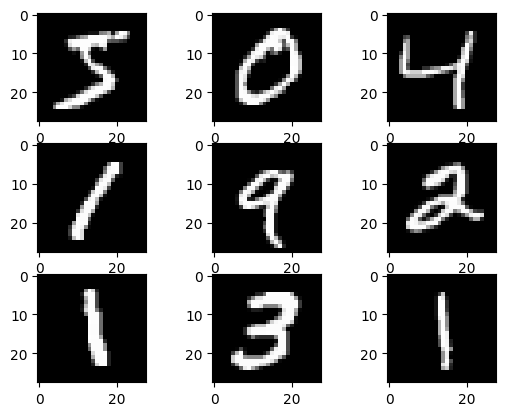

In [ ]:
# example of loading the mnist dataset
import numpy as np
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
import tensorflow as tf
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from keras.models import Sequential,  load_model, Model
from keras.optimizers import SGD
from keras.layers import BatchNormalization
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [ ]:


trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

# one hot encode target values
trainY = to_categorical(trainy)
testY = to_categorical(testy)

# convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

In [ ]:
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    #model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    return model
model=define_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 10)                8

In [ ]:


opt = SGD(learning_rate=0.0001, momentum=0.9)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#history = model.fit(train_norm, trainY, epochs=25, batch_size=100, validation_data=(test_norm, testY), verbose=1)
model.save('Model/mnistClassifier.h5')
np.save('Model/mnistClassifier.npy',history.history)

Epoch 1/25
600/600 [==============================] - 58s 96ms/step - loss: 1.4538 - accuracy: 0.6010 - val_loss: 0.8613 - val_accuracy: 0.7939
Epoch 2/25
600/600 [==============================] - 47s 79ms/step - loss: 0.6773 - accuracy: 0.8260 - val_loss: 0.5206 - val_accuracy: 0.8657
Epoch 3/25
600/600 [==============================] - 46s 76ms/step - loss: 0.4780 - accuracy: 0.8705 - val_loss: 0.4079 - val_accuracy: 0.8919
Epoch 4/25
600/600 [==============================] - 46s 76ms/step - loss: 0.3965 - accuracy: 0.8905 - val_loss: 0.3518 - val_accuracy: 0.9036
Epoch 5/25
600/600 [==============================] - 49s 81ms/step - loss: 0.3501 - accuracy: 0.9016 - val_loss: 0.3153 - val_accuracy: 0.9119
Epoch 6/25
600/600 [==============================] - 49s 81ms/step - loss: 0.3192 - accuracy: 0.9084 - val_loss: 0.2883 - val_accuracy: 0.9198
Epoch 7/25
600/600 [==============================] - 41s 69ms/step - loss: 0.2955 - accuracy: 0.9151 - val_loss: 0.2680 - val_accuracy:

KeyboardInterrupt: ignored

In [ ]:
 # evaluate model
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))




> 83.890


# loss Plot

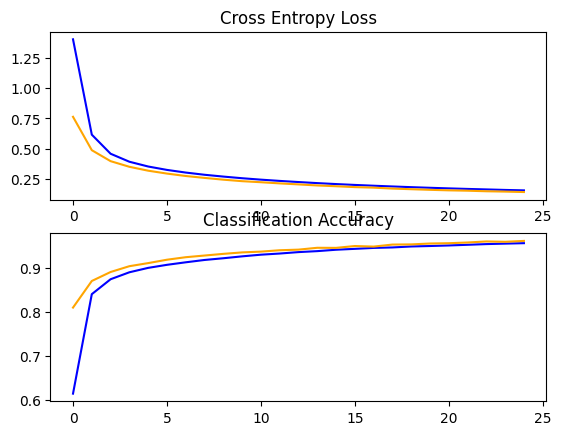

In [ ]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
  # plot loss
  plt.subplot(2, 1, 1)
  plt.title('Cross Entropy Loss')
  plt.plot(histories.history['loss'], color='blue', label='train')
  plt.plot(histories.history['val_loss'], color='orange', label='test')
  # plot accuracy
  plt.subplot(2, 1, 2)
  plt.title('Classification Accuracy')
  plt.plot(histories.history['accuracy'], color='blue', label='train')
  plt.plot(histories.history['val_accuracy'], color='orange', label='test')
  plt.show()
summarize_diagnostics(history)

# Feature Map

['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'flatten', 'dense']
1/1 [==============================] - 0s 76ms/step
(1, 26, 26, 32)
(1, 11, 11, 32)


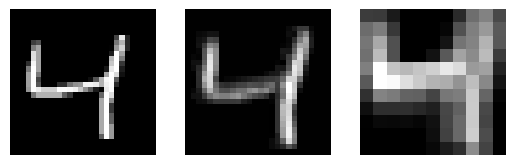

In [ ]:
img=train_norm[2]
#m3= load_model('Model/mnistClassifier.h5')
#print(m3.summary())
layer_names = [layer.name for layer in m3.layers]
print(layer_names)
layer_outputs = [layer.output for layer in m3.layers]

feature_map_model = tf.keras.models.Model(inputs=m3.input, outputs=layer_outputs)
img2=np.reshape(img,(1,28,28,1))
feature_maps = feature_map_model.predict(img2)
#for layer_name, feature_map in zip(layer_names, feature_maps):
# print(f"The shape of the {layer_name} is =======>> {feature_map.shape}")
plt.subplot(1,3,1)
plt.axis('off')
plt.imshow(img ,cmap='gray')
i=2
for layer_name, feature_map in zip(layer_names, feature_maps):
    if layer_name == 'conv2d' or layer_name == 'conv2d_1':
      feature_image=feature_map[:,:,:,20:25]#,axis=3)
      print(feature_map.shape)
      plt.subplot(1,3,i)
      plt.axis('off')
      img1=np.mean(feature_image,axis=3)
      plt.imshow(img1[0,:,:],cmap='gray')
      i +=1





# MNIST classification From Scratch

In [ ]:
input = keras.Input(shape=(28,28,1), name="digits")
model1=define_model()
outputs = model1(input)
model = Model(inputs=input, outputs=outputs)

In [ ]:
batch_size=60

train_dataset = tf.data.Dataset.from_tensor_slices((train_norm, trainY))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

# Prepare the validation dataset.
val_dataset = tf.data.Dataset.from_tensor_slices((test_norm, testY))
val_dataset = val_dataset.batch(batch_size)
optimizer = keras.optimizers.SGD(learning_rate=1e-3)
# Instantiate a loss function.
#loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

def loss_fn(y_true,y_pred):
  #loss =tf.reduce_mean(keras.losses.mean_squared_error(y_true, y_pred))
  elements1 = -tf.math.multiply_no_nan(x=tf.math.log(y_pred), y=y_true)
  loss1=tf.reduce_mean(tf.reduce_sum(elements1,axis=1))
  # elements2 = -tf.math.multiply_no_nan(x=tf.math.log(1.0001-y_pred), y=1-y_true)
  # loss2=tf.reduce_mean(elements2)
  elements3 = y_pred*y_true
  acc=tf.reduce_mean(tf.reduce_sum(tf.round(elements3,0),axis=1))  #
  return loss1,acc

In [ ]:
for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
  print(x_batch_train.shape,y_batch_train.shape)
  break

(60, 28, 28, 1) (60, 10)


In [ ]:
epochs = 2
for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))
    # Iterate over the batches of the dataset.
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
        # Open a GradientTape to record the operations run
        # during the forward pass, which enables auto-differentiation.
        with tf.GradientTape() as tape:
            # Run the forward pass of the layer.
            # to its inputs are going to be recorded on the GradientTape.
            logits = model(x_batch_train, training=True)  # Logits for this minibatch
            # Compute the loss value for this minibatch.
            loss_value,acc = loss_fn(y_batch_train, logits)
        # Use the gradient tape to automatically retrieve
        # the gradients of the trainable variables with respect to the loss.
        grads = tape.gradient(loss_value, model.trainable_weights)
        # Run one step of gradient descent by updating
        # the value of the variables to minimize the loss.
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        # Log every 100 batches.
        if step % 100 == 0:
            print( "Step %d: , Loss:%.4f,  Acc: %.4f" % (step, float(loss_value), float(acc)) )
            #print("Seen so far: %s samples" % ((step + 1) * batch_size))


Start of epoch 0
Step 0: , Loss:0.2580,  Acc: 0.9000
Step 100: , Loss:0.3334,  Acc: 0.8333
Step 200: , Loss:0.3689,  Acc: 0.8667
Step 300: , Loss:0.2582,  Acc: 0.9000
Step 400: , Loss:0.3554,  Acc: 0.8667
Step 500: , Loss:0.4697,  Acc: 0.8167
Step 600: , Loss:0.3695,  Acc: 0.8667
Step 700: , Loss:0.2700,  Acc: 0.9167
Step 800: , Loss:0.4158,  Acc: 0.8500
Step 900: , Loss:0.2971,  Acc: 0.8833

Start of epoch 1
Step 0: , Loss:0.3613,  Acc: 0.8833
Step 100: , Loss:0.2540,  Acc: 0.8667
Step 200: , Loss:0.2196,  Acc: 0.9167
Step 300: , Loss:0.2345,  Acc: 0.9000
Step 400: , Loss:0.3206,  Acc: 0.9000
Step 500: , Loss:0.4074,  Acc: 0.8833
Step 600: , Loss:0.2359,  Acc: 0.9333
Step 700: , Loss:0.1555,  Acc: 0.9667
Step 800: , Loss:0.2550,  Acc: 0.9000
Step 900: , Loss:0.2752,  Acc: 0.8667


# Learn Sign wave

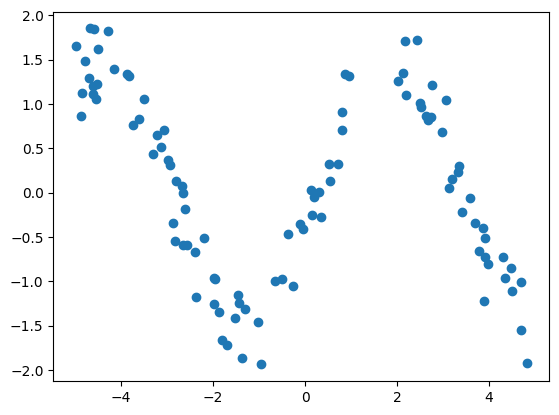

In [ ]:
K=1000
import numpy as np
import math
import matplotlib.pyplot as plt
def generate(K):
  x=np.sort(np.random.uniform(-5, 5, K))
  y=[]
  for i in range(K):
    amplitude = np.random.uniform(1.0, 2.0)
    phase =  np.random.uniform(0, np.pi/6)
    y.append(amplitude * np.sin(x[i]-phase))

  return np.reshape(x,(-1,1)),y

x,y=generate(100)
plt.scatter(x,y)
#plt.plot(x,np.sin(x))


In [ ]:
batch_size=20
train_dataset = tf.data.Dataset.from_tensor_slices((x,y))
dataset = train_dataset.shuffle(buffer_size=128).batch(batch_size)


In [ ]:
class SineModel(keras.Model):
    def __init__(self):
        super().__init__()
        self.hidden1 = keras.layers.Dense(40, input_shape=(1,),activation='relu')
        self.hidden2 = keras.layers.Dense(40,activation='relu')
        self.out = keras.layers.Dense(1)

    def forward(self, x):
        x = keras.activations.relu(self.hidden1(x))
        x = keras.activations.relu(self.hidden2(x))
        x = self.out(x)
        return x

model = SineModel()
for i, sinusoid_generator in enumerate(dataset):
            x, y = sinusoid_generator
            print(x.shape)
            logits = model.forward(x)

            break

(20, 1)


In [ ]:
import time
def loss_function(pred_y, y):
  return keras_backend.mean(keras.losses.mean_squared_error(y, pred_y))

def np_to_tensor(list_of_numpy_objs):
    return (tf.convert_to_tensor(obj) for obj in list_of_numpy_objs)


def train_model(model,dataset, epochs=10, lr=0.001, log_steps=100):
    optimizer = keras.optimizers.Adam(learning_rate=lr)
    losses = []

    start = time.time()

    for epoch in range(epochs):
        total_loss = 0
        for i, sinusoid_generator in enumerate(dataset):
            x, y = sinusoid_generator
            with tf.GradientTape() as tape:
               logits = model.forward(x)
               loss=loss_function(logits,y)

            gradients=tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients,  model.trainable_variables))

            total_loss += loss
            curr_loss = total_loss / (i + 1.0)
            losses.append(curr_loss)

            if i % log_steps == 0 and i > 0:
                print('Step {}: loss = {}, Time to run {} steps = {:.2f} seconds'.format(
                    i, curr_loss, log_steps, time.time() - start))
                start = time.time()
    plt.plot(losses)
    plt.title('Loss Vs Time steps')
    plt.show()
    return model

Step 100: loss = 1.27522611618042, Time to run 100 steps = 2.46 seconds
Step 200: loss = 1.773146629333496, Time to run 100 steps = 1.18 seconds
Step 300: loss = 1.383968472480774, Time to run 100 steps = 1.12 seconds
Step 400: loss = 1.1138584613800049, Time to run 100 steps = 1.16 seconds
Step 100: loss = 1.6342016458511353, Time to run 100 steps = 2.29 seconds
Step 200: loss = 1.6654218435287476, Time to run 100 steps = 1.15 seconds
Step 300: loss = 1.3985944986343384, Time to run 100 steps = 1.18 seconds
Step 400: loss = 1.2020059823989868, Time to run 100 steps = 1.22 seconds
Step 100: loss = 1.5098323822021484, Time to run 100 steps = 2.90 seconds
Step 200: loss = 1.5371886491775513, Time to run 100 steps = 1.24 seconds
Step 300: loss = 1.1988303661346436, Time to run 100 steps = 1.22 seconds
Step 400: loss = 0.979753851890564, Time to run 100 steps = 1.19 seconds
Step 100: loss = 1.3205825090408325, Time to run 100 steps = 2.31 seconds
Step 200: loss = 1.3112448453903198, Time t

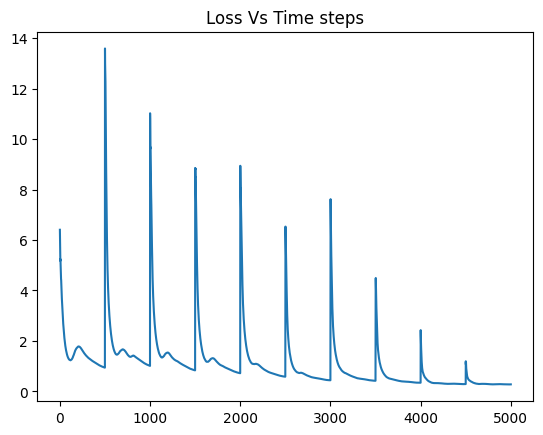

In [ ]:
model = SineModel()
neural_net = train_model(model,dataset)

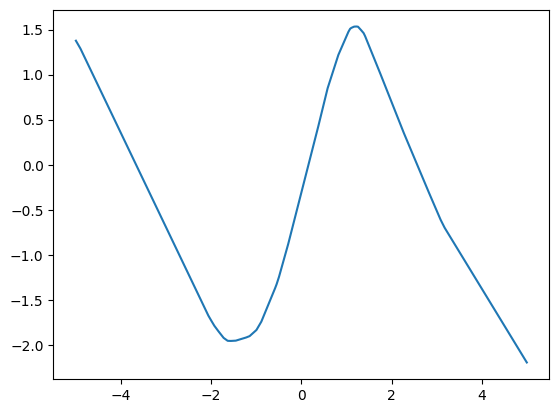

In [ ]:
y_pred=model.forward(x)

plt.plot(x,y_pred)

# NN for logic gate

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, itr, learning_rate):
       self.W = np.array([-1,0.2,0.5]) #np.zeros(self.n + 1) #
       self.itr = itr
       self.learning_rate = learning_rate

    def predict(self, X):
        sigma = self.W[0]+np.dot(X, self.W[1:])
        #Sigma=w0+x1w1+x2w2
        return 1. / (1 + np.exp(-sigma))

    def gradient(self,yy,y,x):
        return (yy-y)*yy*(1-yy)*x

    def train(self, X, Y):
        for i in range(self.itr):
            los=0
            for x, y in zip(X, Y):
                yy = self.predict(x)
                self.W[1:] -= self.learning_rate * self.gradient(yy,y,x)
                self.W[0] -= self.learning_rate *self.gradient(yy,y,1)
                los=(los+(y - yy))/len(Y)

            loss.append(los)
            print("epoch:",i, "loss:", los)

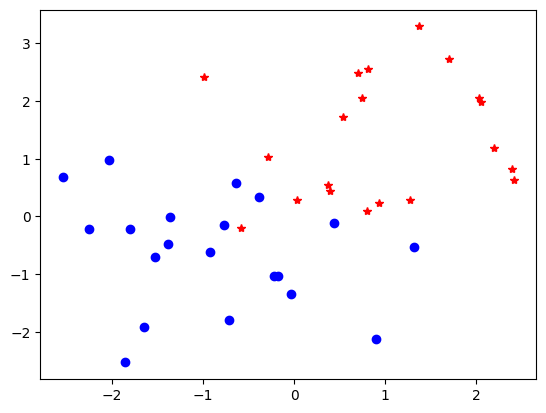

In [ ]:


#X = np.array([[1, 1],[1,0],[0,1],[0,0]])
#Y = np.array([1, 0, 0, 0])
x_red = np.random.randn(20, 2) + 1
x_blue = np.random.randn(20, 2) -1
X = np.reshape(np.vstack((x_red, x_blue)),(40,2))
Y = np.vstack((np.zeros((20,1)),np.ones((20,1))))

plt.plot(x_red[:,0], x_red[:,1], 'r*')
plt.plot(x_blue[:,0], x_blue[:,1], 'bo')



In [ ]:

loss=[]
model = Perceptron( itr=100, learning_rate=0.01)
model.train(X,Y)

epoch: 0 loss: [0.01790844]
epoch: 1 loss: [0.01786671]
epoch: 2 loss: [0.01781454]
epoch: 3 loss: [0.01775133]
epoch: 4 loss: [0.01767692]
epoch: 5 loss: [0.01759167]
epoch: 6 loss: [0.01749633]
epoch: 7 loss: [0.01739195]
epoch: 8 loss: [0.01727982]
epoch: 9 loss: [0.01716136]
epoch: 10 loss: [0.01703803]
epoch: 11 loss: [0.01691126]
epoch: 12 loss: [0.01678241]
epoch: 13 loss: [0.01665271]
epoch: 14 loss: [0.01652323]
epoch: 15 loss: [0.01639488]
epoch: 16 loss: [0.01626841]
epoch: 17 loss: [0.01614439]
epoch: 18 loss: [0.01602326]
epoch: 19 loss: [0.01590533]
epoch: 20 loss: [0.01579081]
epoch: 21 loss: [0.01567984]
epoch: 22 loss: [0.01557246]
epoch: 23 loss: [0.01546868]
epoch: 24 loss: [0.01536846]
epoch: 25 loss: [0.01527173]
epoch: 26 loss: [0.01517842]
epoch: 27 loss: [0.01508842]
epoch: 28 loss: [0.01500161]
epoch: 29 loss: [0.01491788]
epoch: 30 loss: [0.01483711]
epoch: 31 loss: [0.01475918]
epoch: 32 loss: [0.01468397]
epoch: 33 loss: [0.01461135]
epoch: 34 loss: [0.01454

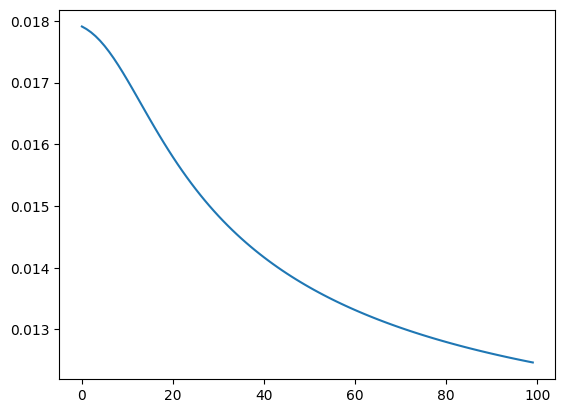

In [ ]:

new_x= np.array([1, 0.4])
model.predict(new_x)

plt.plot(loss)


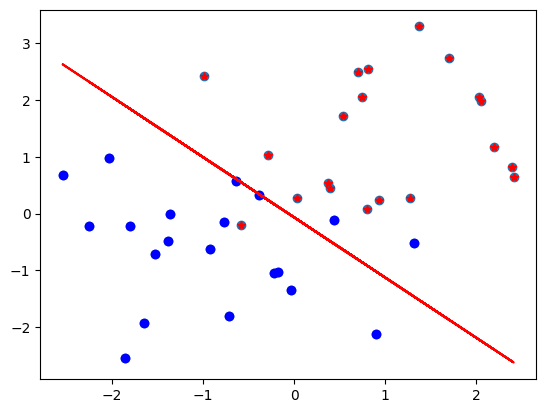

In [ ]:
w=model.W
x1=X[:,0] ; x2=X[:,1];
plt.scatter(x1,x2)
plt.plot(x_red[:,0], x_red[:,1], 'r*')
plt.plot(x_blue[:,0], x_blue[:,1], 'bo')
x2=-(w[1]/w[2])*x1-w[0]/w[2]
plt.plot(x1,x2,color='r')